In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()
import alpaca_trade_api as tradeapi

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bfode\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [136]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [137]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [138]:
# Fetch the Goldman Sachs news articles
# YOUR CODE HERE!
Goldman_Sachs = newsapi.get_everything(q="Goldman Sachs Group Inc and inflation",language="en")
Goldman_Sachs["totalResults"]


# Print total articles
print(f"Total Goldman_Sachs news articles: {Goldman_Sachs['totalResults']}")

Goldman_Sachs["articles"][4]

Total Goldman_Sachs news articles: 150


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'David Randall',
 'title': 'Wall St Week Ahead Investors eye high-dividend stocks as Treasury yields languish - Reuters',
 'description': 'Expectations that Treasury yields may stay tame in the second half of the year are pushing some investors to take a second look at companies whose dividend payouts beat those offered on U.S. government bonds.',
 'url': 'https://www.reuters.com/business/wall-st-week-ahead-investors-eye-high-dividend-stocks-treasury-yields-languish-2021-07-02/',
 'urlToImage': 'https://www.reuters.com/resizer/ef_GTKFqufw1rQceTD-mZa8iXvA=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/4TNDDVB7KRJ5BPV27HNQNSDY7U.jpg',
 'publishedAt': '2021-07-02T22:18:00Z',
 'content': 'A Wall Street sign is pictured outside the New York Stock Exchange in New York, October 28, 2013. REUTERS/Carlo AllegriNEW YORK, July 2 (Reuters) - Expectations that Treasury yields may stay tame in … [+

In [139]:
#Goldman_Sachs = pd.DataFrame(Goldman_Sachs)
#Goldman_Sachs.to_csv('../data/Goldman_Sachs.csv')

In [140]:
# Create the  sentiment scores DataFrame
# YOUR CODE HERE!
Goldman_Sachs_sentiments = []

for article in Goldman_Sachs["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Goldman_Sachs_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            "date": date
            
        })
        
    except AttributeError:
        pass
    

Goldman_Sachs_df = pd.DataFrame(Goldman_Sachs_sentiments)
Goldman_Sachs_df


,compound,positive,negative,neutral,text,date
0,0.0000,0.000,0.000,1.000,A Goldman Sachs sign is seen above the floor o...,2021-06-22
1,0.0000,0.000,0.000,1.000,People are seen on Wall Street outside the New...,2021-06-21
2,0.0000,0.000,0.000,1.000,A street sign for Wall Street is seen outside ...,2021-06-29
3,0.0000,0.000,0.000,1.000,A Wall Street sign is pictured outside the New...,2021-07-06
4,0.2023,0.055,0.000,0.945,A Wall Street sign is pictured outside the New...,2021-07-02
5,0.0000,0.000,0.000,1.000,A Wall Street sign outside the New York Stock ...,2021-06-18
6,0.3400,0.068,0.000,0.932,NEW YORK (Reuters) - The Federal Reserves hawk...,2021-06-18
7,0.5023,0.087,0.000,0.913,The Federal Reserve made some big headlines th...,2021-06-18
8,0.4588,0.109,0.057,0.833,People were already worried about equities six...,2021-06-25
9,0.0258,0.140,0.137,0.723,Everything might be securities fraud\r\nWe \r\...,2021-06-22


In [141]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Goldman_Sachs_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.008595,0.046850,0.044800,0.908250
std,0.319996,0.047504,0.054324,0.082013
min,-0.718400,0.000000,0.000000,0.723000
25%,-0.113125,0.000000,0.000000,0.841250
50%,0.000000,0.055000,0.000000,0.919000
75%,0.202300,0.084000,0.090500,1.000000
max,0.502300,0.140000,0.146000,1.000000


In [142]:
### Natural Language Processing

In [143]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [144]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stopWords = set(stopwords.words('english'))
print(len(stopWords))
print(stopWords)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

179
{'i', 'you', 'your', 'here', 'these', 'to', 'this', 'mightn', 'had', 'couldn', "shouldn't", 'own', 'ourselves', 'further', 'o', 'ours', 'yourself', 'as', 'our', 'during', 'themselves', 'so', 'hadn', 'should', 'it', "hadn't", 'from', "aren't", 'have', 'some', 'against', "that'll", 'haven', 'in', 'off', "won't", 'now', 'was', 'at', 'ain', 'will', 'himself', 'wouldn', 'and', 'my', "it's", 'whom', 'having', "mightn't", 'that', 'by', 'weren', 'itself', 'yourselves', 'who', 'its', 'only', 'did', 'shouldn', 'until', 'were', 'an', 'which', 'than', 'just', "needn't", 'while', "weren't", 'herself', 'they', 'the', 'we', 'nor', "you're", 'she', 'ma', 'not', 'why', 'can', 'such', 'few', 'them', 'all', "should've", 'm', 'under', "shan't", 'if', 'doesn', "couldn't", 'again', 'there', 'me', 'each', 'isn', 'both', 'hers', 'hasn', 'a', 'has', 'does', 'doing', 's', 'over', "doesn't", 'up', "wasn't", 'very', 'down', 'no', 'same', 'don', 'wasn', 'because', 'him', 'how', 'his', 'her', 'do', 'about', 'sh

In [145]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in stopWords]
    
    return output
    

In [146]:
# Create a new tokens column for WallStreet_Bets
# YOUR CODE HERE!
Goldman_Sachs_df['tokens'] = Goldman_Sachs_df.text.apply(tokenizer)
Goldman_Sachs_df.head()

,compound,positive,negative,neutral,text,date,tokens
0,0.0000,0.000,0.0,1.000,A Goldman Sachs sign is seen above the floor o...,2021-06-22,"[goldman, sachs, sign, seen, floor, new, york,..."
1,0.0000,0.000,0.0,1.000,People are seen on Wall Street outside the New...,2021-06-21,"[people, seen, wall, street, outside, new, yor..."
2,0.0000,0.000,0.0,1.000,A street sign for Wall Street is seen outside ...,2021-06-29,"[street, sign, wall, street, seen, outside, ne..."
3,0.0000,0.000,0.0,1.000,A Wall Street sign is pictured outside the New...,2021-07-06,"[wall, street, sign, pictured, outside, new, y..."
4,0.2023,0.055,0.0,0.945,A Wall Street sign is pictured outside the New...,2021-07-02,"[wall, street, sign, pictured, outside, new, y..."


In [147]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [209]:
# Format current date as ISO format
# YOUR CODE HERE!

start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
#today = pd.Timestamp("2021-04-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["WFC", "GS","MS","SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.tail()

GS                                         MS  \
                             open      high      low   close   volume   open   
2020-08-03 00:00:00-04:00  198.49  199.8800  196.530  199.39  4222375  49.22   
2020-08-04 00:00:00-04:00  199.35  201.7200  198.475  201.65  3688146  49.50   
2020-08-05 00:00:00-04:00  203.17  204.8075  203.010  204.48  4088479  49.59   
2020-08-06 00:00:00-04:00  205.00  206.2900  203.830  204.25  3316362  49.83   
2020-08-07 00:00:00-04:00  203.48  208.8000  202.450  208.27  5694814  49.21   

                                                                SPY          \
                             high    low  close    volume      open    high   
2020-08-03 00:00:00-04:00  49.905  48.72  49.47  11369869  328.3200  329.62   
2020-08-04 00:00:00-04:00  49.770  49.08  49.26  11431220  327.8600  330.06   
2020-08-05 00:00:00-04:00  49.960  49.44  49.78  11894233  331.4700  332.39   
2020-08-06 00:00:00-04:00  49.980  49.24  49.46  10118777  331.4799  334.46   
2020-08-07 00:00:00-04:00  50.470  49.08  50.35  11121376  333.2800  334.88   

                                                       WFC                \
                              low   close    volume   open   high    low   
2020-08-03 00:00:00-04:00  327.73  328.76  89861354  24.25  24.50  23.90   
2020-08-04 00:00:00-04:00  327.86  330.03  73684427  24.20  24.29  24.03   
2020-08-05 00:00:00-04:00  331.18  332.06  72941562  24.40  24.75  24.34   
2020-08-06 00:00:00-04:00  331.13  334.31  76988181  24.20  24.50  24.12   
2020-08-07 00:00:00-04:00  332.30  334.55  98710236  24.13  25.22  24.00   

                                            
                           close    volume  
2020-08-03 00:00:00-04:00  24.30  52779706  
2020-08-04 00:00:00-04:00  24.22  53890753  
2020-08-05 00:00:00-04:00  24.39  60841700  
2020-08-06 00:00:00-04:00  24.25  75782256  
2020-08-07 00:00:00-04:00  25.07  77686591

In [210]:
#Saving Raw data to Raw Data Folder
df_portfolio.to_csv('../../data/cleandata/df_portfolio.csv')

In [235]:
# Get 3 years' worth of historical data for SPY and AGG
#Wells Fargo Co. (WFC), Goldman Sachs Group Inc. (GS), and Morgan Stanley (MS).

# Format current date as ISO format
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-30', tz='America/New_York').isoformat()
tickers = ["WFC", "GS","MS","SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

GS                                          MS  \
                             open      high     low     close   volume   open   
2019-01-02 00:00:00-05:00  164.33  172.2500  163.35  171.5600  3592312  39.02   
2019-01-03 00:00:00-05:00  170.66  171.7700  168.29  169.6300  3462254  40.22   
2019-01-04 00:00:00-05:00  172.99  176.0000  171.10  175.4901  2794038  40.50   
2019-01-07 00:00:00-05:00  175.23  177.8250  172.27  176.0700  2609770  41.51   
2019-01-08 00:00:00-05:00  177.78  178.0999  172.90  175.3200  2306569  42.30   

                                                              SPY          \
                            high    low   close    volume    open    high   
2019-01-02 00:00:00-05:00  40.72  38.76  40.305   9225170  245.98  251.21   
2019-01-03 00:00:00-05:00  40.22  39.25  39.675  10212075  248.23  248.57   
2019-01-04 00:00:00-05:00  41.58  40.28  41.555  10212613  247.59  253.11   
2019-01-07 00:00:00-05:00  42.16  40.98  41.770  10626187  252.69  255.95   
2019-01-08 00:00:00-05:00  42.41  41.08  41.435   9944602  256.82  257.31   

                                                         WFC                 \
                              low   close     volume    open    high    low   
2019-01-02 00:00:00-05:00  245.95  249.89  107236613  45.525  46.930  45.41   
2019-01-03 00:00:00-05:00  244.03  244.46  113782919  46.650  47.345  46.37   
2019-01-04 00:00:00-05:00  247.17  252.41  122528832  47.420  48.110  47.20   
2019-01-07 00:00:00-05:00  251.69  254.40   88317608  47.780  48.230  47.54   
2019-01-08 00:00:00-05:00  254.00  256.65   88864452  47.900  48.160  46.92   

                                             
                            close    volume  
2019-01-02 00:00:00-05:00  46.865  16553465  
2019-01-03 00:00:00-05:00  46.655  19953966  
2019-01-04 00:00:00-05:00  47.915  19804914  
2019-01-07 00:00:00-05:00  47.715  17632046  
2019-01-08 00:00:00-05:00  47.540  16653807

In [236]:
df_stock_data.to_csv('../../data/Rawdata/df_stock_data.csv')

In [237]:
df_stock_data.isnull().sum()

GS   open      0
     high      0
     low       0
     close     0
     volume    0
MS   open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
WFC  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [238]:
df_stock_data.dropna(inplace=True)
df_stock_data

GS                                         \
                             open      high       low     close   volume   
2019-01-02 00:00:00-05:00  164.33  172.2500  163.3500  171.5600  3592312   
2019-01-03 00:00:00-05:00  170.66  171.7700  168.2900  169.6300  3462254   
2019-01-04 00:00:00-05:00  172.99  176.0000  171.1000  175.4901  2794038   
2019-01-07 00:00:00-05:00  175.23  177.8250  172.2700  176.0700  2609770   
2019-01-08 00:00:00-05:00  177.78  178.0999  172.9000  175.3200  2306569   
...                           ...       ...       ...       ...      ...   
2021-06-24 00:00:00-04:00  363.00  370.8800  362.7800  368.7300  2276831   
2021-06-25 00:00:00-04:00  370.60  371.1499  364.5400  368.6700  2176947   
2021-06-28 00:00:00-04:00  368.03  368.8700  363.8600  368.5950  1491640   
2021-06-29 00:00:00-04:00  374.75  378.0900  370.7495  372.6200  2151889   
2021-06-30 00:00:00-04:00  370.90  380.1100  370.9000  379.4450  1823472   

                              MS                                      SPY  \
                            open   high     low   close    volume    open   
2019-01-02 00:00:00-05:00  39.02  40.72  38.760  40.305   9225170  245.98   
2019-01-03 00:00:00-05:00  40.22  40.22  39.250  39.675  10212075  248.23   
2019-01-04 00:00:00-05:00  40.50  41.58  40.280  41.555  10212613  247.59   
2019-01-07 00:00:00-05:00  41.51  42.16  40.980  41.770  10626187  252.69   
2019-01-08 00:00:00-05:00  42.30  42.41  41.080  41.435   9944602  256.82   
...                          ...    ...     ...     ...       ...     ...   
2021-06-24 00:00:00-04:00  86.62  87.39  85.835  87.080   6886244  424.89   
2021-06-25 00:00:00-04:00  87.30  88.62  86.720  88.400   8274607  425.90   
2021-06-28 00:00:00-04:00  88.25  88.20  86.430  87.700   5089844  427.17   
2021-06-29 00:00:00-04:00  91.20  91.63  89.780  90.640  14238151  427.89   
2021-06-30 00:00:00-04:00  90.17  91.91  90.130  91.680   8166030  427.20   

                                                                   WFC  \
                               high     low   close     volume    open   
2019-01-02 00:00:00-05:00  251.2100  245.95  249.89  107236613  45.525   
2019-01-03 00:00:00-05:00  248.5700  244.03  244.46  113782919  46.650   
2019-01-04 00:00:00-05:00  253.1100  247.17  252.41  122528832  47.420   
2019-01-07 00:00:00-05:00  255.9500  251.69  254.40   88317608  47.780   
2019-01-08 00:00:00-05:00  257.3100  254.00  256.65   88864452  47.900   
...                             ...     ...     ...        ...     ...   
2021-06-24 00:00:00-04:00  425.5500  424.62  425.09   39863529  44.260   
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57   50460394  45.540   
2021-06-28 00:00:00-04:00  427.6500  425.89  427.48   43937373  46.000   
2021-06-29 00:00:00-04:00  428.5600  427.13  427.68   32097572  46.000   
2021-06-30 00:00:00-04:00  428.7800  427.18  428.08   46776402  44.660   

                                                             
                             high    low    close    volume  
2019-01-02 00:00:00-05:00  46.930  45.41  46.8650  16553465  
2019-01-03 00:00:00-05:00  47.345  46.37  46.6550  19953966  
2019-01-04 00:00:00-05:00  48.110  47.20  47.9150  19804914  
2019-01-07 00:00:00-05:00  48.230  47.54  47.7150  17632046  
2019-01-08 00:00:00-05:00  48.160  46.92  47.5400  16653807  
...                           ...    ...      ...       ...  
2021-06-24 00:00:00-04:00  45.420  44.20  45.1800  25321028  
2021-06-25 00:00:00-04:00  46.650  45.22  46.3701  34592273  
2021-06-28 00:00:00-04:00  46.070  45.09  45.7900  23729482  
2021-06-29 00:00:00-04:00  46.380  44.60  44.8000  26581925  
2021-06-30 00:00:00-04:00  45.385  44.45  45.2900  14547897  

[629 rows x 20 columns]

In [239]:
df_stock_data.to_csv('../../data/cleandata/df_stock_data.csv')

In [240]:
closing_price_gs = pd.DataFrame(df_stock_data["GS"]["close"])
closing_price_ms = pd.DataFrame(df_stock_data["MS"]["close"])
closing_price_wfc = pd.DataFrame(df_stock_data["WFC"]["close"])
closing_price_spy = pd.DataFrame(df_stock_data["SPY"]["close"])
all_closing_price = pd.concat([closing_price_gs, closing_price_ms, closing_price_wfc, closing_price_spy], axis="columns", join="inner")
all_closing_price.index = all_closing_price.index.date
all_closing_price.columns = ["WFC", "GS","MS","SPY"]
all_closing_price

,WFC,GS,MS,SPY
2019-01-02,171.5600,40.305,46.8650,249.89
2019-01-03,169.6300,39.675,46.6550,244.46
2019-01-04,175.4901,41.555,47.9150,252.41
2019-01-07,176.0700,41.770,47.7150,254.40
2019-01-08,175.3200,41.435,47.5400,256.65
...,...,...,...,...
2021-06-24,368.7300,87.080,45.1800,425.09
2021-06-25,368.6700,88.400,46.3701,426.57
2021-06-28,368.5950,87.700,45.7900,427.48
2021-06-29,372.6200,90.640,44.8000,427.68


In [ ]:
csv_path = Path("../csvs/covid_cases.csv/")
covid_data = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

##covid_data.sort_index(ascending = True, inplace = True)
covid_data.tail()


In [218]:
all_closing_price_returns = all_closing_price.pct_change().dropna()
all_closing_price_returns.head(10)

,WFC,GS,MS,SPY
2021-06-01,0.001388,0.006079,0.001916,-0.000676
2021-06-01,-0.000290,0.001565,0.004994,-0.001851
2021-06-01,-0.000449,-0.002747,-0.001903,-0.000202
2021-06-01,0.008482,0.007238,0.004025,0.000107
2021-06-01,-0.003354,-0.002574,-0.002110,-0.001570
2021-06-01,0.002945,0.001075,0.001903,0.000857
2021-06-01,0.001258,-0.000107,-0.000844,0.000095
2021-06-01,0.003011,-0.001396,-0.000211,0.000286
2021-06-01,-0.000235,-0.001452,-0.001479,-0.000024
2021-06-01,0.000131,-0.000916,-0.000317,-0.001071


In [219]:
all_closing_price = all_closing_price.pct_change().dropna()
all_closing_price

,WFC,GS,MS,SPY
2021-06-01,0.001388,0.006079,0.001916,-0.000676
2021-06-01,-0.000290,0.001565,0.004994,-0.001851
2021-06-01,-0.000449,-0.002747,-0.001903,-0.000202
2021-06-01,0.008482,0.007238,0.004025,0.000107
2021-06-01,-0.003354,-0.002574,-0.002110,-0.001570
...,...,...,...,...
2021-06-29,0.000323,0.000553,-0.001007,0.000562
2021-06-29,0.004428,0.002763,0.004257,0.000211
2021-06-29,-0.000549,-0.000110,0.001896,0.000234
2021-06-29,-0.001046,-0.003251,-0.000445,-0.000327


In [220]:
closing_price_gs = pd.DataFrame(df_stock_data["GS"])
closing_price_gs.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [221]:
closing_price_gs = pd.DataFrame(df_stock_data["GS"]["close"])
closing_price_gs.columns=["GS"]
closing_price_gs

,GS
2021-06-01 09:30:00-04:00,378.195
2021-06-01 09:45:00-04:00,378.720
2021-06-01 10:00:00-04:00,378.610
2021-06-01 10:15:00-04:00,378.440
2021-06-01 10:30:00-04:00,381.650
...,...
2021-06-29 14:45:00-04:00,371.530
2021-06-29 15:00:00-04:00,373.175
2021-06-29 15:15:00-04:00,372.970
2021-06-29 15:30:00-04:00,372.580


In [222]:
closing_price_gs["Returns"] = closing_price_gs.pct_change()* 100
closing_price_gs['Lagged_Return'] = closing_price_gs['Returns'].shift()
closing_price_gs = closing_price_gs.dropna()
closing_price_gs.tail()

,GS,Returns,Lagged_Return
2021-06-29 14:45:00-04:00,371.530,0.032309,-0.244413
2021-06-29 15:00:00-04:00,373.175,0.442764,0.032309
2021-06-29 15:15:00-04:00,372.970,-0.054934,0.442764
2021-06-29 15:30:00-04:00,372.580,-0.104566,-0.054934
2021-06-29 15:45:00-04:00,372.595,0.004026,-0.104566


In [223]:
closing_price_gs["Returns"] = closing_price_gs.pct_change()* 100
closing_price_gs["Returns"]

<ipython-input-223-cf3643d69bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price_gs["Returns"] = closing_price_gs.pct_change()* 100


2021-06-01 10:00:00-04:00         NaN
2021-06-01 10:15:00-04:00   -0.044901
2021-06-01 10:30:00-04:00    0.848219
2021-06-01 10:45:00-04:00   -0.335386
2021-06-01 11:00:00-04:00    0.294450
                               ...   
2021-06-29 14:45:00-04:00    0.032309
2021-06-29 15:00:00-04:00    0.442764
2021-06-29 15:15:00-04:00   -0.054934
2021-06-29 15:30:00-04:00   -0.104566
2021-06-29 15:45:00-04:00    0.004026
Name: Returns, Length: 544, dtype: float64

In [224]:
closing_price_gs["Returns"] = closing_price_gs.pct_change()* 100
closing_price_gs['Lagged_Return'] = closing_price_gs['Returns'].shift()
closing_price_gs = closing_price_gs.dropna()
closing_price_gs.tail()

<ipython-input-224-f1fa53f01584>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price_gs["Returns"] = closing_price_gs.pct_change()* 100
<ipython-input-224-f1fa53f01584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price_gs['Lagged_Return'] = closing_price_gs['Returns'].shift()


,GS,Returns,Lagged_Return
2021-06-29 14:45:00-04:00,371.530,0.032309,-0.244413
2021-06-29 15:00:00-04:00,373.175,0.442764,0.032309
2021-06-29 15:15:00-04:00,372.970,-0.054934,0.442764
2021-06-29 15:30:00-04:00,372.580,-0.104566,-0.054934
2021-06-29 15:45:00-04:00,372.595,0.004026,-0.104566


In [225]:
gs_df = pd.DataFrame(df_stock_data["GS"])
gs_df.head()

,open,high,low,close,volume
2021-06-01 09:30:00-04:00,377.570,380.03,377.00,378.195,25900.0
2021-06-01 09:45:00-04:00,377.350,379.09,377.33,378.720,7691.0
2021-06-01 10:00:00-04:00,378.425,379.80,378.42,378.610,6132.0
2021-06-01 10:15:00-04:00,379.020,379.68,377.73,378.440,13198.0
2021-06-01 10:30:00-04:00,378.990,381.87,378.99,381.650,9437.0


In [226]:
gs_df['Return'] = gs_df.close.pct_change() * 100
gs_df['Lagged_Return'] = gs_df['Return'].shift()
gs_df = gs_df.dropna()
gs_df.tail()

,open,high,low,close,volume,Return,Lagged_Return
2021-06-29 14:45:00-04:00,371.160,371.610,370.940,371.530,1661.0,0.032309,-0.244413
2021-06-29 15:00:00-04:00,371.525,373.185,371.525,373.175,1393.0,0.442764,0.032309
2021-06-29 15:15:00-04:00,372.920,373.280,372.810,372.970,4079.0,-0.054934,0.442764
2021-06-29 15:30:00-04:00,372.830,372.850,372.420,372.580,3678.0,-0.104566,-0.054934
2021-06-29 15:45:00-04:00,372.850,372.970,372.460,372.595,6301.0,0.004026,-0.104566


In [227]:
train = gs_df[:'2021-06-27']
test = gs_df['2021-06-28':]

In [228]:
X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

In [229]:
y_test.head()

2021-06-28 09:30:00-04:00   -1.130694
2021-06-28 09:45:00-04:00    0.691112
2021-06-28 10:00:00-04:00   -0.408552
2021-06-28 10:15:00-04:00    0.404759
2021-06-28 10:30:00-04:00   -0.345927
Name: Return, dtype: float64

In [230]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
!
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [231]:
# Make a prediction of "y" values using just the test dataset

predicted_y_values = model.predict(X_test)

In [232]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:

Results = y_test.to_frame()
Results["Predicted Return"] = predicted_y_values

In [233]:
Results.head(5)

,Return,Predicted Return
2021-06-28 09:30:00-04:00,-1.130694,-0.003921
2021-06-28 09:45:00-04:00,0.691112,0.001773
2021-06-28 10:00:00-04:00,-0.408552,-0.009153
2021-06-28 10:15:00-04:00,0.404759,-0.002558
2021-06-28 10:30:00-04:00,-0.345927,-0.007436


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78D1026A0>,
      dtype=object)

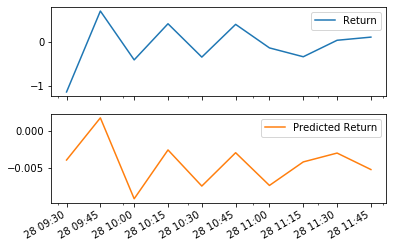

In [234]:
Results[:10].plot(subplots=True)